In [2]:
print("Testing")

Testing


In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
# Open the zip file for reading
with zipfile.ZipFile("../../Data/corona-out-3.zip", "r") as zip_file:
    # Extract all the files in the zip file to the current directory
    zip_file.extractall(path="../../Data/")

In [3]:
twitterdf = pd.read_json('../../Data/corona-out-3',lines = True)

In [4]:
twitterdf.head()

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,quote_count,reply_count,retweet_count,favorite_count,entities,extended_entities,favorited,retweeted,possibly_sensitive,filter_level,lang,timestamp_ms,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,withheld_in_countries
0,2020-04-25 12:21:41+00:00,1254022770679320576,1254022770679320576,"É isto, ou vou morrer sem ar ou com o corona h...","[0, 44]","<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,None,"{'id': 804046791348015107, 'id_str': '80404679...",None,None,None,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...","{'media': [{'id': 1254022759824461824, 'id_str...",False,False,0.0,low,pt,2020-04-25 12:21:41.803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-25 12:21:41+00:00,1254022770746372096,1254022770746372096,Schöne Runde mit dem Rennrad ✌️\n#sport #coron...,"[0, 46]","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,None,"{'id': 2242948745, 'id_str': '2242948745', 'na...",None,None,"{'id': '6c741a421f6c33ff', 'url': 'https://api...",NaN,False,0,0,0,0,"{'hashtags': [{'text': 'sport', 'indices': [32...","{'media': [{'id': 1254022763834155008, 'id_str...",False,False,0.0,low,de,2020-04-25 12:21:41.819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-25 12:21:42+00:00,1254022772558368768,1254022772558368768,RT @BJP4India: India’s war with Corona is ongo...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,None,"{'id': 908326492718764034, 'id_str': '90832649...",None,None,None,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,False,NaN,low,en,2020-04-25 12:21:42.251,{'created_at': 'Sat Apr 25 07:30:12 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-25 12:21:42+00:00,1254022772575043586,1254022772575043584,Was sollen 150 Euro Computerzuschuss bringen? ...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,NaN,NaN,NaN,None,"{'id': 2929344220, 'id_str': '2929344220', 'na...",None,None,None,NaN,True,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,False,False,NaN,low,de,2020-04-25 12:21:42.255,NaN,1.254016e+18,1.254016e+18,{'created_at': 'Sat Apr 25 11:56:31 +0000 2020...,"{'url': 'https://t.co/xn4jgGqfoY', 'expanded':...",{'full_text': 'Was sollen 150 Euro Computerzus...,NaN
4,2020-04-25 12:21:42+00:00,1254022772877131777,1254022772877131776,RT @schrodingerk42: @ozkan_yalim @DurmusYillma...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,None,"{'id': 1206650133976408064, 'id_str': '1206650...",None,None,None,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,False,NaN,low,tr,2020-04-25 12:21:42.327,{'created_at': 'Tue Apr 21 12:34:00 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(f"Min date-time of tweet is {twitterdf['created_at'].min()}")
print(f"Max date-time of tweet is {twitterdf['created_at'].max()}")

Min date-time of tweet is 2020-04-25 12:21:41+00:00
Max date-time of tweet is 2020-04-25 14:48:38+00:00


In [6]:
# Print the number of unique users
twitterdf['user'] = twitterdf['user'].astype(str)
num_users = len(twitterdf['user'].unique())
print('Number of unique users:', num_users)

# Print the number of tweets
num_tweets = len(twitterdf)
print('Number of tweets:', num_tweets)

# Print the top 5 domains in the 'source' column
domains = twitterdf['source'].str.extract(r'<a href=".*?">(.*?)</a>', expand=False)
print('Top 5 domains in the "source" column:')
print(domains.value_counts().head())

# Print the top 5 most common hashtags
hashtags = twitterdf['entities'].apply(lambda x: [tag['text'].lower() for tag in x['hashtags']])
hashtags = hashtags.explode()
print('Top 5 most common hashtags:')
print(hashtags.value_counts().head())

Number of unique users: 101063
Number of tweets: 101916
Top 5 domains in the "source" column:
Twitter for Android    53019
Twitter for iPhone     23280
Twitter Web App        16797
Twitter for iPad        2216
Twitter Web Client      1353
Name: source, dtype: int64
Top 5 most common hashtags:
corona         6096
25aprile       1557
mattarella     1507
coronavirus    1317
covid19        1256
Name: entities, dtype: int64


Number of unique users: 101063
Number of tweets: 101916


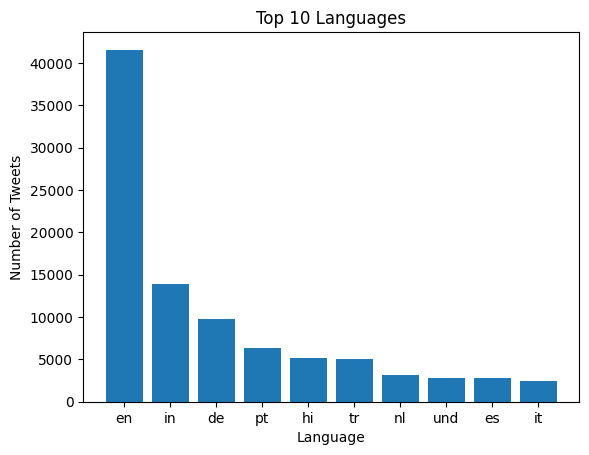

In [7]:
# Convert the user column from dictionaries to strings
twitterdf['user'] = twitterdf['user'].astype(str)

# Print the number of unique users
num_users = len(twitterdf['user'].unique())
print('Number of unique users:', num_users)

# Print the number of tweets
num_tweets = len(twitterdf)
print('Number of tweets:', num_tweets)

# Create a bar chart of the top 10 languages used in the tweets
top_langs = twitterdf['lang'].value_counts().nlargest(10)
plt.bar(top_langs.index, top_langs.values)
plt.title('Top 10 Languages')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
plt.show()

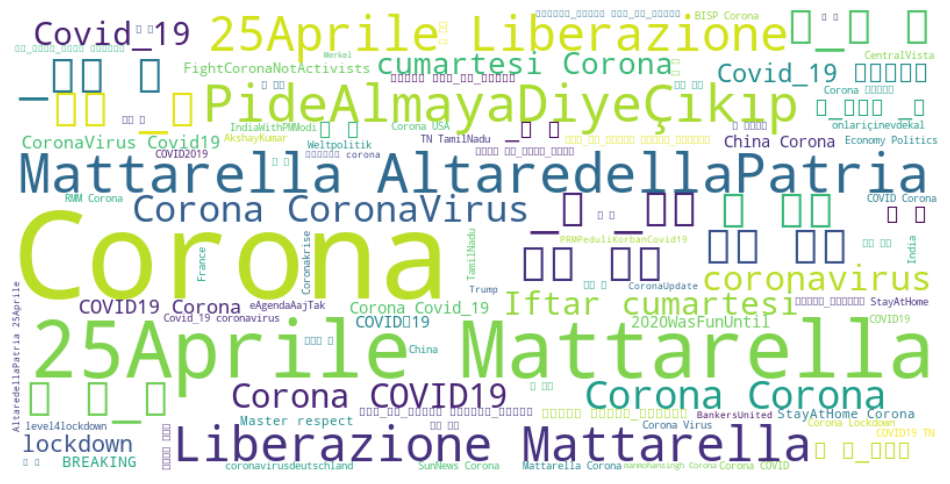

In [8]:
# Printing wordcloud from entities
hashtags = twitterdf['entities'].apply(lambda x: [tag['text'] for tag in x['hashtags']])
hashtags = ' '.join(hashtags.explode().dropna().values)


# Create a word cloud of the most common hashtags
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(hashtags)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


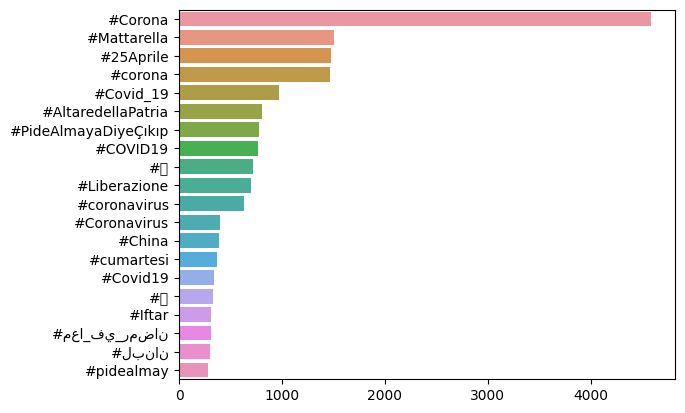

In [9]:
import re
import seaborn as sns
import matplotlib.pyplot as plt

# extract hashtags from text column
hashtags = twitterdf['text'].apply(lambda x: re.findall(r'\#\w+', x))

# create a flat list of hashtags
hashtags_flat = [h for hashtags_list in hashtags for h in hashtags_list]

# count the frequency of each hashtag
hashtags_count = {h:hashtags_flat.count(h) for h in set(hashtags_flat)}

# sort the hashtags by frequency in descending order
hashtags_count_sorted = sorted(hashtags_count.items(), key=lambda x: x[1], reverse=True)

# extract the top 20 hashtags
top_hashtags = dict(hashtags_count_sorted[:20])

# plot the top 20 hashtags
sns.barplot(x=list(top_hashtags.values()), y=list(top_hashtags.keys()))
plt.show()


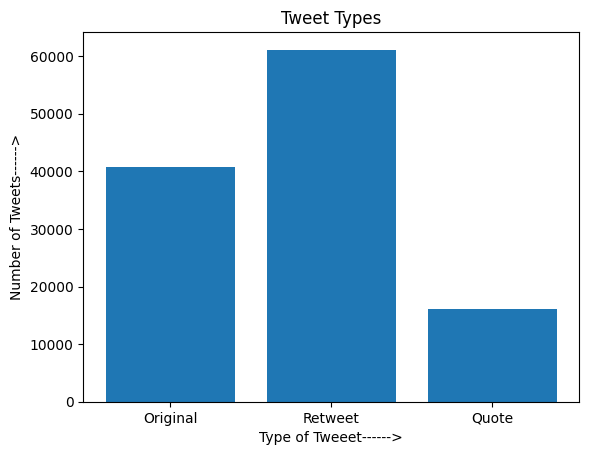

In [10]:
# Count the number of original tweets, retweets, and quotes
num_original = (~twitterdf['text'].str.startswith('RT ')).sum()
num_retweets = twitterdf['retweeted_status'].notna().sum()
num_quotes = twitterdf['quoted_status'].notna().sum()

# Plot a stacked bar chart of the tweet types
plt.bar(['Original', 'Retweet', 'Quote'], [num_original, num_retweets, num_quotes])
plt.title('Tweet Types')
plt.xlabel('Type of Tweeet------>')
plt.ylabel('Number of Tweets------>')
plt.show()
